1.Data Integrity: Ensuring the accuracy, consistency, and reliability of data throughout the
cleaning process.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

df= pd.read_csv("AB_NYC_2019.csv")
print(df.shape)
df.head()

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
# Check Frequency of each category (unique)
cate_cols = df.select_dtypes(include= "object").columns
for col in cate_cols:
    
    print(df[col].value_counts(dropna=False))
    print("\n")

name
Hillside Hotel                                        18
Home away from home                                   17
NaN                                                   16
New york Multi-unit building                          16
Brooklyn Apartment                                    12
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47906, dtype: int64


host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11453, dtype: int64

In [5]:
# removing all the wrong pricing from the dataset
df = df[df['price'] > 0]
df.shape

(48884, 16)

2.Missing Data Handling: Dealing with missing values by either imputing them or making
informed decisions on how to handle gaps in the dataset.

In [6]:
misng_vals = df.isnull().sum()
misng_prcnt = (misng_vals / len(df)) * 100
print(misng_prcnt)

id                                 0.000000
name                               0.032731
host_id                            0.000000
host_name                          0.042959
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.560920
reviews_per_month                 20.560920
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


In [ ]:
df.isnull().any(axis=0) ## checking which columns has all null values

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [56]:
df.dropna(subset=['name'], inplace=True)
df['host_name'] = df['host_name'].fillna("Unknown")
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df['last_review'] = pd.to_datetime(df['last_review'])
print(df.isnull().sum())


id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6257
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64


3.Duplicate Removal: Identifying and eliminating duplicate records to maintain data
uniqueness

In [39]:
df.duplicated().sum()

0

4.Standardization: Consistent formatting and units across the dataset for accurate analysis.

In [44]:
# Strip spaces and title-case key categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.title()


In [46]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [48]:
print("\nneighbourhood_group unique values:", df['neighbourhood_group'].unique())
print("room_type unique values:", df['room_type'].unique())


neighbourhood_group unique values: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
room_type unique values: ['Private Room' 'Entire Home/Apt' 'Shared Room']


In [49]:
df.dtypes


id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

5.Outlier Detection: Identifying and addressing outliers that may skew analysis or model
performance.

In [51]:
# Show summary statistics
df[['price', 'minimum_nights', 'reviews_per_month', 'availability_365', 
    'number_of_reviews', 'calculated_host_listings_count']].describe()


,price,minimum_nights,reviews_per_month,availability_365,number_of_reviews,calculated_host_listings_count
count,48868.000000,48868.000000,48868.000000,48868.000000,48868.000000,48868.000000
mean,152.756732,7.010948,1.091138,112.787161,23.278730,7.146538
std,240.202905,20.017604,1.597363,131.618305,44.556899,32.961406
min,10.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,69.000000,1.000000,0.040000,0.000000,1.000000,1.000000
50%,106.000000,3.000000,0.370000,45.000000,5.000000,1.000000
75%,175.000000,5.000000,1.580000,227.000000,24.000000,2.000000
max,10000.000000,1250.000000,58.500000,365.000000,629.000000,327.000000


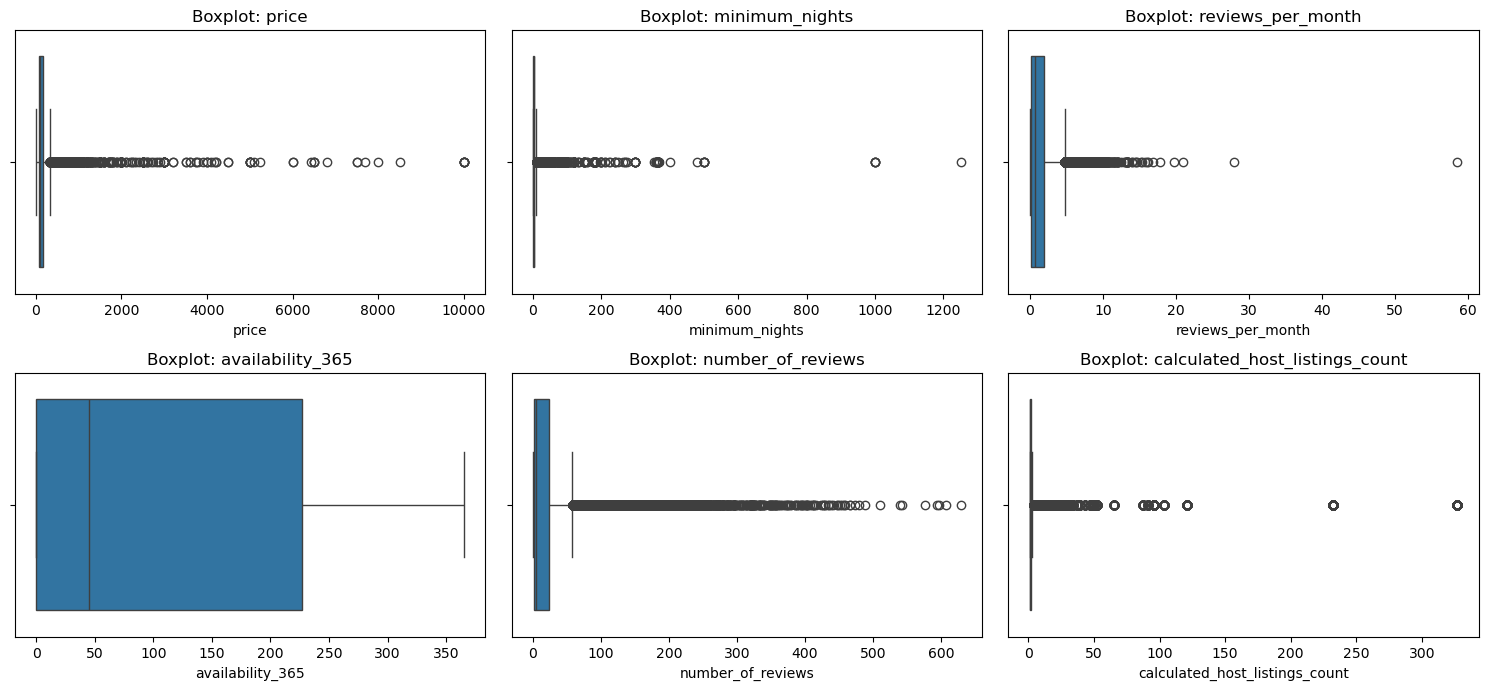

In [18]:

col_plt = ['price', 'minimum_nights', 'reviews_per_month', 
                   'availability_365', 'number_of_reviews', 'calculated_host_listings_count']

plt.figure(figsize=(15, 10))

for i, col1 in enumerate(col_plt, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col1])
    plt.title(f"Boxplot: {col1}")
plt.tight_layout()
plt.show()


In [23]:
# Removes outliers based on the IQR method for a single coumn
def filter_outliers_iqr(dataframe,column_name):
    q1= dataframe[column_name].quantile(0.25)
    q3= dataframe[column_name].quantile(0.75)

    iqr=q3-q1

    lowbound= q1- 1.5 * iqr
    upprbound = q3 + 1.5 * iqr
    return dataframe[(dataframe[column_name] >= lowbound) & (dataframe[column_name] <= upprbound)]
for i in col_plt:
    df = filter_outliers_iqr(df, i)

df.reset_index(drop=True, inplace=True)

In [24]:
# Confirm max values are reasonable now
df[col_plt].describe()


,price,minimum_nights,reviews_per_month,availability_365,number_of_reviews,calculated_host_listings_count
count,11110.000000,11110.000000,11110.000000,11110.000000,11110.000000,11110.0
mean,117.937174,2.869847,0.383337,5.715032,5.883888,1.0
std,59.910408,1.694930,0.466402,14.736751,5.633847,0.0
min,10.000000,1.000000,0.010000,0.000000,1.000000,1.0
25%,70.000000,2.000000,0.070000,0.000000,2.000000,1.0
50%,101.000000,2.000000,0.190000,0.000000,4.000000,1.0
75%,150.000000,4.000000,0.490000,0.000000,8.000000,1.0
max,290.000000,7.000000,2.270000,77.000000,24.000000,1.0


Summary:-

  Inspecting the structure and contents of the dataset
  Identifying and handling missing or invalid values
  Removing listings with price errors and unrealistic values
  Applying the Interquartile Range (IQR) method to detect and eliminate outliers across important numerical columns
  Creating visualizations (boxplots) to explore data distribution and support cleaning decisions